## CA 2, LLMs Spring 2024

- **Name: Sina Tabassi**
- **Student ID: 810199554**

---
#### Your submission should be named using the following format: `CA2_LASTNAME_STUDENTID_gpt.ipynb`.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TA via email:
sepehr.kamahi@ut.ac.ir

---

## Section 1: Generate a Single Sentence (20 points)
Write a prompt that has ten tokens according to the GPT-2 tokenizer. (2 points)

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
import numpy as np
import time
model_name = "gpt2"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
## print the tokens, input_ids, and attention_mask

prompt = "translate the following sentence in persian language please"

tokens = tokenizer(prompt, return_tensors="pt")


print("Tokens:", tokenizer.convert_ids_to_tokens(tokens["input_ids"][0]))
print("Input IDs:", tokens["input_ids"])
print("Attention Mask:", tokens["attention_mask"])

Tokens: ['trans', 'late', 'Ġthe', 'Ġfollowing', 'Ġsentence', 'Ġin', 'Ġpers', 'ian', 'Ġlanguage', 'Ġplease']
Input IDs: tensor([[ 7645, 17660,   262,  1708,  6827,   287,  2774,   666,  3303,  3387]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


### a) Load the model to the GPU
Use the prompt you wrote and generate 190 new tokens, appending each new token to the previous sequence at each step. Measure the time of generating each new token. You CAN ONLY use PyTorch for decoding; use greedy decoding. You will get a 200-token sequence at the end, so print the sentence.

Plot the time needed for generating each new token. Use torch.cuda.max_memory_allocated and plot the memory used at each step in MB. At each step, by giving the input_ids to the model as the labels argument, the loss will be calculated for you automatically. Plot the loss at all steps.
(compute loss only for this part of the assignment)

Explain the patterns you see in the plots. (8 points)

In [ ]:
input_ids = tokenizer.encode(prompt, return_tensors="pt")

generated_tokens = []
total_time = 0
for _ in range(190):
    start_time = time.time()
    with torch.no_grad():
        outputs = model(input_ids)
    next_token_logits = outputs.logits[:, -1, :]
    next_token_id = torch.argmax(next_token_logits, dim=-1)
    input_ids = torch.cat([input_ids, next_token_id.unsqueeze(-1)], dim=-1)
    generated_tokens.append(next_token_id.item())
    total_time += time.time() - start_time

generated_text = tokenizer.decode(input_ids.squeeze().tolist())
print("Generated Sentence:")
print(generated_text)

avg_generation_time = total_time / 190
print("Average time per token generation:", avg_generation_time, "seconds")


Generated Sentence:
translate the following sentence in persian language please:

"The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China
Average ti

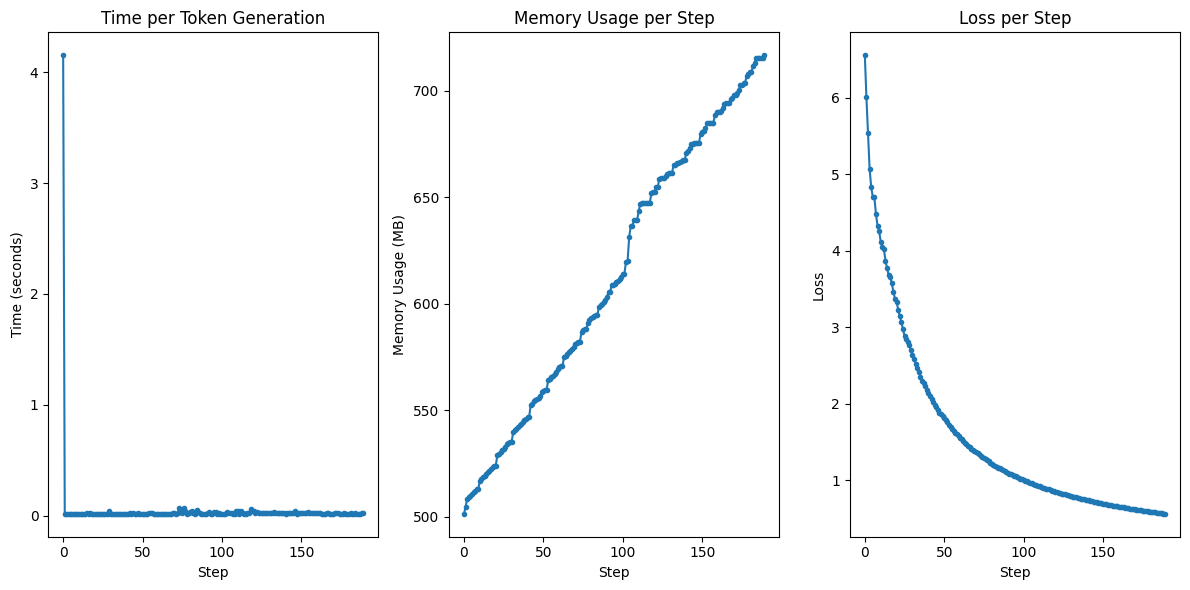

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

prompt = "translate the following sentence in persian language please"
input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
model.to(device)

times = []
mem_usage = []
losses = []

model.eval()

with torch.no_grad():
    for _ in range(190):
        start_time = time.time()

        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss
        losses.append(loss.item())

        mem_usage.append(torch.cuda.max_memory_allocated(device=device) / 1024 / 1024)

        next_token_logits = outputs.logits[:, -1, :]
        next_token_id = torch.argmax(next_token_logits, dim=-1)
        input_ids = torch.cat([input_ids, next_token_id.unsqueeze(-1)], dim=-1)

        elapsed_time = time.time() - start_time
        times.append(elapsed_time)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(times, marker='.')
plt.xlabel('Step')
plt.ylabel('Time (seconds)')
plt.title('Time per Token Generation')

plt.subplot(1, 3, 2)
plt.plot(mem_usage, marker='.')
plt.xlabel('Step')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage per Step')

plt.subplot(1, 3, 3)
plt.plot(losses, marker='.')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss per Step')

plt.tight_layout()
plt.show()


### Plots Explanation

**Time:**
In the context of GPT-2 processing, it is understood that each token is processed independently of preceding tokens, and the entire sequence is not processed for each token. Consequently, the temporal progression remains constant during the processing of each token at every step.

**Memory Usage:**
In the course of processing each token in GPT-2, the model retains information. Consequently, with the advancement of token processing, there is a progressive accumulation of information following each step. This phenomenon is visually evident in the plotted data, where memory exhibits a linear increase with each successive token processing step.

**Loss:**
It is established that the model's performance improves with each step of token processing, achieved through the iterative minimization of the loss function. This iterative refinement process is reflected in the plotted data, where the loss diminishes progressively as the prediction continues.

### b) Use past_key_values
Give the past_key_values to the model during generation, and repeat all of the above steps; then, compare the results. (10 points)

In [ ]:
torch.cuda.empty_cache()
device = "cuda"
model = model.to(device)

tokens = tokenizer(prompt, return_tensors="pt").to(device)
torch.cuda.empty_cache()

times = []
memory_usage = []
throughput = []
start_step = len(tokens["input_ids"][0, :])
all_tokens = tokens["input_ids"]

torch.cuda.reset_peak_memory_stats()

with torch.no_grad():
    past_key_values = None
    for _ in range(200 - start_step):
        start_time = time.time()

        outputs = model(**tokens, labels=tokens["input_ids"], past_key_values=past_key_values)

        elapsed_time = time.time() - start_time
        times.append(elapsed_time)
        throughput.append(1/elapsed_time)

        next_token_logits = outputs.logits[:, -1, :]
        next_token = next_token_logits.argmax(-1)

        tokens["input_ids"] = next_token.unsqueeze(-1)
        tokens["attention_mask"] = torch.ones((1, 1), device=device)
        all_tokens = torch.cat([all_tokens, next_token.unsqueeze(-1)], dim=-1)

        past_key_values = outputs.past_key_values

        memory_usage.append(torch.cuda.max_memory_allocated() / 1024 / 1024)

        loss = outputs.loss.item()
        losses.append(loss)



total_tokens_generated = all_tokens.numel()
throughput = total_tokens_generated / sum(times)
print("Throughput:", throughput, "tokens per second")

generated_sentence = tokenizer.decode(all_tokens.squeeze())
print("Generated Sentence:", generated_sentence)

average_time_per_token = sum(times) / len(times)
print("Average Time per Token Generation:", average_time_per_token, "seconds")

Throughput: 100.07222142559415 tokens per second
Generated Sentence: translate the following sentence in persian language please:

"The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people of the country of the Republic of China are the people of the country of the Republic of China. The people o

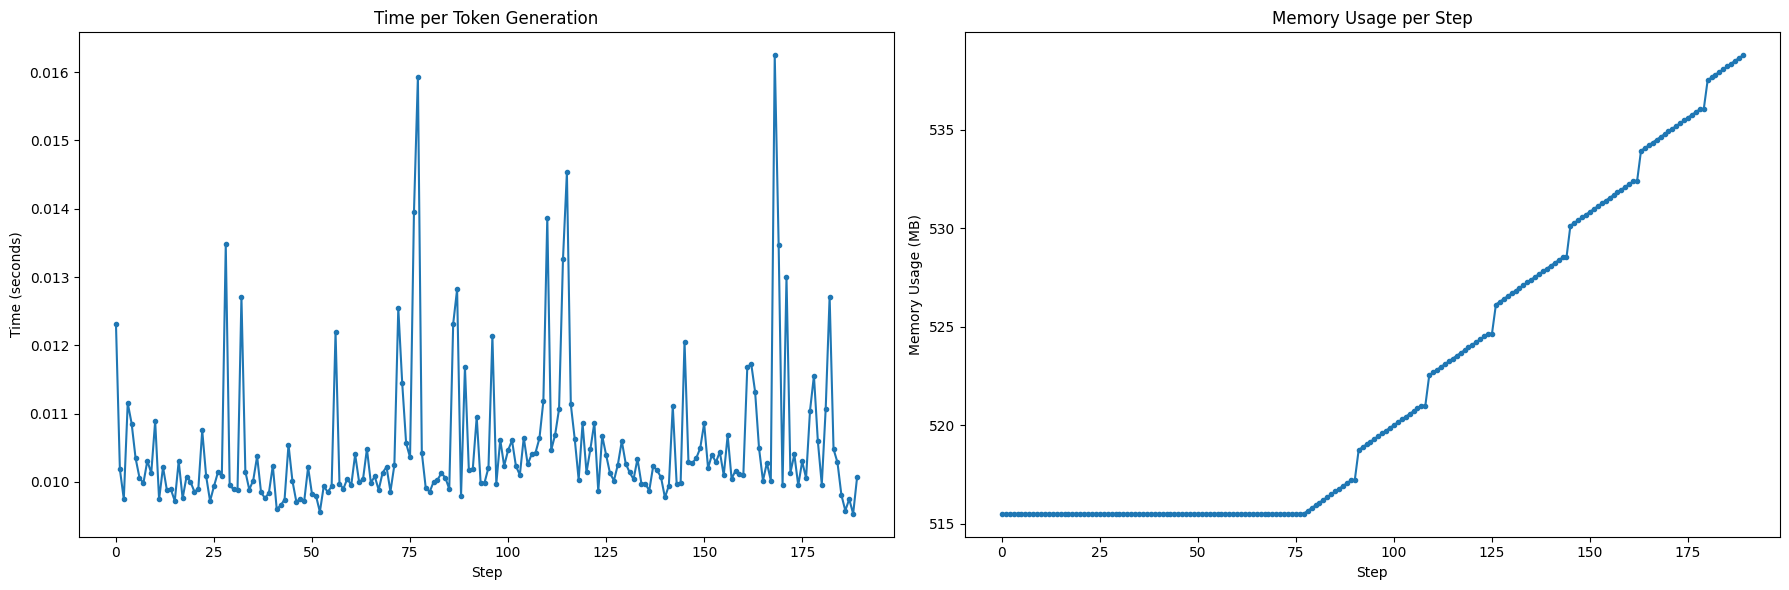

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(times, marker='.')
plt.xlabel('Step')
plt.ylabel('Time (seconds)')
plt.title('Time per Token Generation')

plt.subplot(1, 2, 2)
plt.plot(memory_usage, marker='.')
plt.xlabel('Step')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage per Step')

plt.tight_layout()
plt.show()


### Plots Explanation

**Time:**
In the context of GPT-2 processing, it is understood that each token is processed independently of preceding tokens, and the entire sequence is not processed for each token. Consequently, the temporal progression remains constant during the processing of each token at every step.

**Memory Usage:**
In the course of processing each token in GPT-2, the model retains information. Consequently, with the advancement of token processing, there is a progressive accumulation of information following each step. This phenomenon is visually evident in the plotted data, where memory exhibits a linear increase with each successive token processing step.

###Comparison

**Time:**
As observed in both time plots, the duration taken for generating new tokens remains constant and identical in both scenarios.s

**Memory Usage:**
As evident from both memory usage plots, there is a decrease of approximately 200 MB from part a to part b. This reduction stems from the avoidance of repeated computation in generating each token.

## Section 2: Batch Generation (25 points)
Write 4 prompts (a list of 4 sentences). All the sentences you write should have different lengths. Print the input_ids and attention_mask, and explain why the attention_masks are the way they are. When you tokenize, use left-side padding. Explain why left-side padding is preferable during inference. What is the padding token ID in this particular tokenizer?
(10 points)

In [ ]:
tokenizer.pad_token = tokenizer.eos_token

prompts = [
    "I love sandwich so much.",
    "You probably won't make it in time.",
    "I saw a different movie when I was in cinema with Ali.",
    "To be or not to be, that is the question."
]

for prompt in prompts:
    tokenized_prompt = tokenizer(prompt, return_tensors="pt", padding="max_length", truncation=True, max_length=20, pad_to_max_length=True)
    print("Prompt:", prompt)
    print("Input IDs:", tokenized_prompt["input_ids"])
    print("Attention Mask:", tokenized_prompt["attention_mask"])
    print()


Prompt: I love sandwich so much.
Input IDs: tensor([[   40,  1842, 20433,   523,   881,    13, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Prompt: You probably won't make it in time.
Input IDs: tensor([[ 1639,  2192,  1839,   470,   787,   340,   287,   640,    13, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Prompt: I saw a different movie when I was in cinema with Ali.
Input IDs: tensor([[   40,  2497,   257,  1180,  3807,   618,   314,   373,   287, 22041,
           351, 12104,    13, 50256, 50256, 50256, 50256, 50256, 50256, 50256]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

Prompt: To be or not to be, that is the question.
Input IDs: tensor([[ 2514,   307,

####Explaining attention masks

First, let's clarify why we utilize padding:

- We employ padding to handle sequences of varying lengths within a batch or other scenarios where our inputs must conform to a specific size. This often involves padding shorter sequences to match the length of the longest sequence.


Now, let's elucidate the concept of the attention mask:

- For the added pad tokens (in this case, the eos token), the attention mask is set to 0. An attention mask is a binary sequence that indicates which tokens are actual content and which are paddings. During training, models are instructed to pay attention only to the non-padding tokens. This ensures that the model ignores these tokens, thereby not influencing the model's generated output. Consequently, we save computational resources, as paddings hold no semantic meaning.


#### Explaining left-side padding


- Left-side padding is preferred during inference because it allows the model to process the input sequence in the same manner it was trained. During training, the model learns to predict the next token based on the preceding tokens in the sequence. If right-side padding were employed during inference, the model would encounter padding tokens at the rightmost position, attempting to predict the next word for those, potentially causing confusion and affecting the predictions. Utilizing left-side padding ensures that the model encounters the actual input tokens first, enabling accurate predictions based on the context.


#### Padding token ID

- The token ID for `eos` is 50256

For batch decoding, you should also give position_ids to the model. You should create the position_ids yourself. Explain what position_ids are and how they help. Print the position_ids of your batch prompt. Repeat Section 1, Subsection b, but this time, use the prompt in batch form and give position_ids to the model. Plot the memory needed at each step. Plot the time needed at each step, also plot number of tokens generated per second (a.k.a. throughput). Compare the throughput and memory usage of batch generation with single sentence generation. (15 points)

(1)  Generated sentence: I love sandwich so much.<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>
The first time I saw the new "The Walking Dead" trailer, I was so excited to see the first trailer for the upcoming season of the AMC series. I was so excited to see the first trailer for the upcoming season of the AMC series. I was so excited to see the first trailer for the upcoming season of the AMC series.

The first trailer for the upcoming season of the AMC series was released on Friday, October 4th, and it was a great way to see the first trailer for the upcoming season of the AMC series.

The first trailer for the upcoming season of the AMC series was released on Friday, October 4th, and it was a great way to see the first trailer for the upcoming season of the AMC series.

The first trailer for the upcoming season of the AMC series was released on Friday, October 4th, and it was a great way to see the first trailer for
(2)  Generated sent

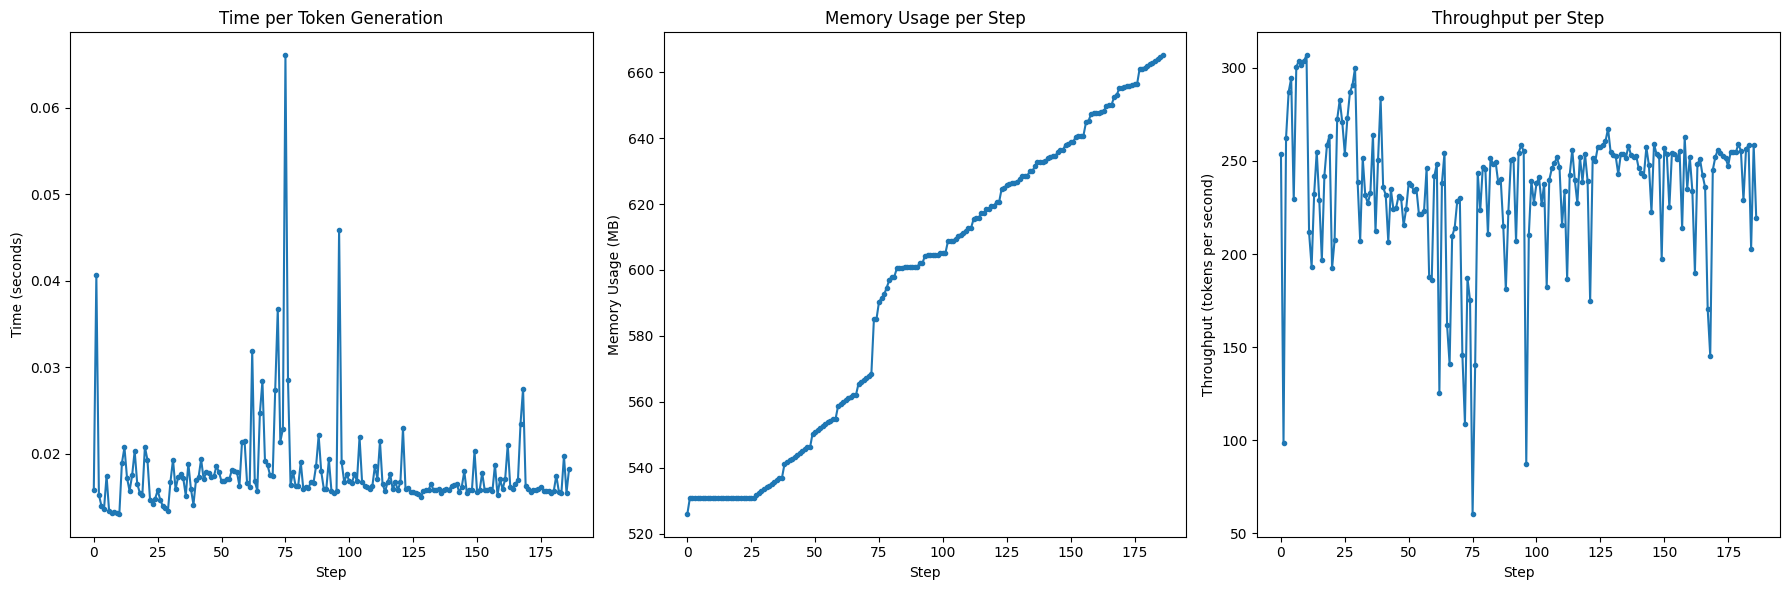

In [ ]:
import torch
import time
import matplotlib.pyplot as plt

torch.cuda.empty_cache()
device = "cuda"
model = model.to(device)

batch_tokens = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True).to(device)

batch_position_ids = torch.arange(len(batch_tokens["input_ids"][0, :])).unsqueeze(0).to("cuda")

model.config.pad_token_id = tokenizer.pad_token_id
all_tokens = batch_tokens["input_ids"]

times = []
memory_usage = []
throughput = []

torch.cuda.reset_peak_memory_stats()
start_step = len(batch_tokens["input_ids"][0,:])

with torch.no_grad():
    past_key_values = None
    for _ in range(200-start_step):
        start_time = time.time()

        outputs = model(input_ids=batch_tokens["input_ids"],
                        attention_mask=batch_tokens["attention_mask"],
                        position_ids=batch_position_ids,
                        past_key_values=past_key_values)

        elapsed_time = time.time() - start_time
        times.append(elapsed_time)

        next_token_logits = outputs.logits[:, -1, :]
        next_token = next_token_logits.argmax(-1)

        all_tokens = torch.cat([all_tokens, next_token.unsqueeze(-1)], dim=1)

        batch_position_ids = torch.tensor([batch_position_ids[:, -1:] + 1], device="cuda").unsqueeze(0).to("cuda")
        batch_tokens["input_ids"] = next_token.unsqueeze(-1)
        batch_tokens["attention_mask"] = torch.ones((batch_tokens["input_ids"].size(0), 1), device="cuda")

        past_key_values = outputs.past_key_values

        memory_usage.append(torch.cuda.max_memory_allocated() / 1024 / 1024)
        throughput.append(batch_tokens["input_ids"].size(0) / (elapsed_time))


for i in range(all_tokens.size(0)):
  generated_sentence = tokenizer.decode(all_tokens[i].squeeze())
  print(f"({i+1})  Generated sentence: {generated_sentence}")
print(f"\nThroughput: {np.mean(throughput)}")

average_time_per_token = sum(times) / len(times)
print("Average Time per Token Generation:", average_time_per_token, "seconds")


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(times, marker='.')
plt.xlabel('Step')
plt.ylabel('Time (seconds)')
plt.title('Time per Token Generation')

plt.subplot(1, 3, 2)
plt.plot(memory_usage, marker='.')
plt.xlabel('Step')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage per Step')

plt.subplot(1, 3, 3)
plt.plot(throughput, marker='.')
plt.xlabel('Step')
plt.ylabel('Throughput (tokens per second)')
plt.title('Throughput per Step')

plt.tight_layout()
plt.show()


#### Explaining Position ids


Positional embeddings play a crucial role in handling inputs of varying lengths. While absolute positional embeddings are typically assigned automatically from 1 to N for the sequence, regardless of any padding tokens, this approach exhibits limitations when dealing with variable-length sequences due to the presence of padding tokens. By explicitly feeding position IDs into the model, we ensure that padding tokens have appropriate position IDs, enabling the model to attend to relevant tokens correctly during computation. Consequently, position IDs assist the model in focusing on relevant tokens while disregarding padding tokens, thereby facilitating accurate modeling of variable-length sequences.


#### Comparison

**Throughput:**
As evident from the plots and the results, Batch Generation yields a higher throughput compared to Single Sentence Generation. Specifically, the mean throughput for Single Sentence Generation is approximately 100, whereas for Batch Generation, it is around 230.

**Memory Usage:**
As observed in the plots, the Memory Usage for Batch Generation exceeds that of Single Sentence Generation. Specifically, the Memory Usage for Batch Generation is approximately 670, whereas for Single Sentence Generation, it is about 570. This disparity in Memory Usage arises due to the generation of multiple sequences simultaneously during Batch Generation.
